# PsoKC 2.0 - PROFILE pipeline

This is a Jupyter notebook that accompanies the "" paper. 

## Stable state identification

In [13]:
import os
import sys

import maboss
import pandas as pd
import biolqm
import ginsim 
from colomoto_jupyter import tabulate
from colomoto.temporal_logics import *
from functools import reduce

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap

pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Import MaBoSS model and convert to bioLQM

<!-- #### Import the MaBoSS model and convert to bioLQM -->

In [2]:
mbs = maboss.load("psoKC.bnd","psoKC.cfg")
lqm = maboss.to_biolqm(mbs)

#### Define markers and their respective phenotypes

In [3]:
#Marker genes + phenotypes:
Marker_genes = ['BAD', 'CASP8', 'FOXO3', 'IFI6', 'IL15', 'CFLAR', 'BCL2', 'CCND1', 'CREB1', 'IL8', 'IL19', 'PGE2', 'HETE12', 'PPARD', 'HBEGF', 'KRT6', 'BIRC3', 'DEFB3', 'TIMP1', 'MYC', 'FLG', 'KRT1', 'CALML5', 'SIRT1', 'CDKN1A', 'WIF1', 'LOR', 'IL6', 'CCL7', 'CXCL1', 'CXCL2', 'CXCL5', 'LTB4', 'CSF3', 'ICAM1', 'NOS2', 'CXCL11', 'ISG15', 'IFNB', 'CCL3', 'S100A7A', 'IFNA', 'S100A7', 'S100A8', 'S100A9', 'DEFB4A', 'EP2_g', 'EP4_g', 'OAS2', 'S100A12', 'LCN2', 'OASL', 'MX1', 'RSAD2', 'SERPINB3_4', 'CXCL3', 'IFNG', 'IL12', 'IL23', 'IL36A', 'IL36G', 'IL1B', 'TNFa', 'CCL2', 'CCL5', 'CCL20']

Phenotype_table = [['Apoptosis', 'Apoptosis', 'Apoptosis', 'Survival','Survival','Survival', 'Survival', 'Survival', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Differentiation', 'Differentiation', 'Differentiation', 'Differentiation', 'Differentiation', 'Differentiation', 'Differentiation', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Inflammation', 'Inflammation', 'Inflammation', 'Inflammation', 'Inflammation', 'Inflammation', 'Inflammation', 'Inflammation', 'Inflammation', 'Inflammation', 'Inflammation', 'Inflammation', 'Inflammation', 'Th1', 'Th1', 'Th1', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22'],
              Marker_genes]


In [4]:
Psoriasis_state = biolqm.perturbation(lqm, "IL22R%1 TNFRSF1A%1 EP4%1 IL17R%1 EP3%0 IFNGR%1 EP2%1 EP1%0 VDR%0 IL6R%1 IL1R1%1 IL36R%1 IFNAR%1")

Psoriasis_state_fix = biolqm.fixpoints(Psoriasis_state)
Psoriasis_state_fix_df = pd.DataFrame(Psoriasis_state_fix)
Psoriasis_state_fix_df = Psoriasis_state_fix_df[Marker_genes]
Psoriasis_state_fix_df.columns = pd.MultiIndex.from_arrays(Phenotype_table, names=['Type', 'Gene'])

Psoriasis_state_fix_df

Type Apoptosis             Survival                       Proliferation      \
Gene       BAD CASP8 FOXO3     IFI6 IL15 CFLAR BCL2 CCND1         CREB1 IL8   
0            0     0     0        1    1     1    1     1             1   1   

Type                                                         Differentiation  \
Gene IL19 PGE2 HETE12 PPARD HBEGF KRT6 BIRC3 DEFB3 TIMP1 MYC             FLG   
0       1    1      1     1     1    1     1     1     1   1               0   

Type                                   Immune cells                         \
Gene KRT1 CALML5 SIRT1 CDKN1A WIF1 LOR          IL6 CCL7 CXCL1 CXCL2 CXCL5   
0       0      0     0      0    0   0            1    1     1     1     1   

Type                                                          Inflammation  \
Gene LTB4 CSF3 ICAM1 NOS2 CXCL11 ISG15 IFNB CCL3 S100A7A IFNA       S100A7   
0       1    1     1    1      1     1    1    1       1    1            1   

Type                                                                    \
Gene S100A8 S100A9 DEFB4A EP2_g EP4_g OAS2 S100A12 LCN2 OASL MX1 RSAD2   
0         1      1      1     1     1    1       1    1    1   1     1   

Type              Th1           Th17/22                                        
Gene SERPINB3_4 CXCL3 IFNG IL12    IL23 IL36A IL36G IL1B TNFa CCL2 CCL5 CCL20  
0             1     1    1    1       1     1     1    1    1    1    1     1

In [6]:
IFNAR = biolqm.perturbation(lqm, "IL17R%0 IL22R%0 EP4%0 TNFRSF1A%0 EP1%0 IFNGR%0 EP2%0 EP3%0 VDR%0 IL6R%0 IL1R1%0 IL36R%0 IFNAR%1")

IFNAR_fix = biolqm.fixpoints(IFNAR) 
IFNAR_fix_df = pd.DataFrame(IFNAR_fix)
IFNAR_fix_df = IFNAR_fix_df[Marker_genes]
IFNAR_fix_df.columns = pd.MultiIndex.from_arrays(Phenotype_table, names=['Type', 'Gene'])

IFNAR_fix_df

Type Apoptosis             Survival                       Proliferation      \
Gene       BAD CASP8 FOXO3     IFI6 IL15 CFLAR BCL2 CCND1         CREB1 IL8   
0            0     0     0        1    1     0    1     1             0   0   

Type                                                         Differentiation  \
Gene IL19 PGE2 HETE12 PPARD HBEGF KRT6 BIRC3 DEFB3 TIMP1 MYC             FLG   
0       0    1      0     1     0    0     0     1     1   1               0   

Type                                   Immune cells                         \
Gene KRT1 CALML5 SIRT1 CDKN1A WIF1 LOR          IL6 CCL7 CXCL1 CXCL2 CXCL5   
0       1      1     0      0    1   0            1    0     1     0     1   

Type                                                          Inflammation  \
Gene LTB4 CSF3 ICAM1 NOS2 CXCL11 ISG15 IFNB CCL3 S100A7A IFNA       S100A7   
0       0    0     1    1      1     1    0    1       1    1            1   

Type                                                                    \
Gene S100A8 S100A9 DEFB4A EP2_g EP4_g OAS2 S100A12 LCN2 OASL MX1 RSAD2   
0         1      1      0     0     0    1       1    0    1   1     1   

Type              Th1           Th17/22                                        
Gene SERPINB3_4 CXCL3 IFNG IL12    IL23 IL36A IL36G IL1B TNFa CCL2 CCL5 CCL20  
0             1     1    1    1       0     0     0    1    1    1    1     1

In [7]:
IL1_fam = biolqm.perturbation(lqm, "IL17R%0 IL22R%0 EP1%0 TNFRSF1A%0 EP4%1 IFNGR%0 EP2%1 EP3%0 VDR%0 IL6R%0 IL1R1%1 IL36R%1 IFNAR%0")

IL1_fam_fix = biolqm.fixpoints(IL1_fam)
IL1_fam_fix_df = pd.DataFrame(IL1_fam_fix)
IL1_fam_fix_df = IL1_fam_fix_df[Marker_genes]
IL1_fam_fix_df.columns = pd.MultiIndex.from_arrays(Phenotype_table, names=['Type', 'Gene'])

IL1_fam_fix_df

Type Apoptosis             Survival                       Proliferation      \
Gene       BAD CASP8 FOXO3     IFI6 IL15 CFLAR BCL2 CCND1         CREB1 IL8   
0            0     0     0        0    1     0    1     1             1   1   

Type                                                         Differentiation  \
Gene IL19 PGE2 HETE12 PPARD HBEGF KRT6 BIRC3 DEFB3 TIMP1 MYC             FLG   
0       0    1      0     1     0    0     1     1     1   1               0   

Type                                   Immune cells                         \
Gene KRT1 CALML5 SIRT1 CDKN1A WIF1 LOR          IL6 CCL7 CXCL1 CXCL2 CXCL5   
0       1      1     0      0    0   0            1    0     1     0     1   

Type                                                          Inflammation  \
Gene LTB4 CSF3 ICAM1 NOS2 CXCL11 ISG15 IFNB CCL3 S100A7A IFNA       S100A7   
0       0    0     1    1      1     0    0    1       1    1            1   

Type                                                                    \
Gene S100A8 S100A9 DEFB4A EP2_g EP4_g OAS2 S100A12 LCN2 OASL MX1 RSAD2   
0         1      1      0     0     0    0       1    0    0   1     1   

Type              Th1           Th17/22                                        
Gene SERPINB3_4 CXCL3 IFNG IL12    IL23 IL36A IL36G IL1B TNFa CCL2 CCL5 CCL20  
0             1     1    1    1       0     0     0    0    1    1    1     1

In [8]:
IL6 = biolqm.perturbation(lqm, "IL17R%0 IL22R%0 EP1%0 IFNGR%0 EP2%1 TNFRSF1A%0 EP4%1 EP3%0 VDR%0 IL6R%1 IL1R1%0 IL36R%0 IFNAR%0")

IL6_fix = biolqm.fixpoints(IL6)
IL6_fix_df = pd.DataFrame(IL6_fix)
IL6_fix_df = IL6_fix_df[Marker_genes]
IL6_fix_df.columns = pd.MultiIndex.from_arrays(Phenotype_table, names=['Type', 'Gene'])

IL6_fix_df

Type Apoptosis             Survival                       Proliferation      \
Gene       BAD CASP8 FOXO3     IFI6 IL15 CFLAR BCL2 CCND1         CREB1 IL8   
0            0     0     0        1    1     0    1     1             1   1   

Type                                                         Differentiation  \
Gene IL19 PGE2 HETE12 PPARD HBEGF KRT6 BIRC3 DEFB3 TIMP1 MYC             FLG   
0       0    1      0     1     0    0     0     1     1   1               0   

Type                                   Immune cells                         \
Gene KRT1 CALML5 SIRT1 CDKN1A WIF1 LOR          IL6 CCL7 CXCL1 CXCL2 CXCL5   
0       1      1     0      0    1   0            1    0     1     0     1   

Type                                                          Inflammation  \
Gene LTB4 CSF3 ICAM1 NOS2 CXCL11 ISG15 IFNB CCL3 S100A7A IFNA       S100A7   
0       0    0     1    1      1     1    0    1       1    1            1   

Type                                                                    \
Gene S100A8 S100A9 DEFB4A EP2_g EP4_g OAS2 S100A12 LCN2 OASL MX1 RSAD2   
0         1      1      0     0     0    1       1    0    1   1     1   

Type              Th1           Th17/22                                        
Gene SERPINB3_4 CXCL3 IFNG IL12    IL23 IL36A IL36G IL1B TNFa CCL2 CCL5 CCL20  
0             1     1    1    1       0     0     0    1    1    1    1     1

Steady states


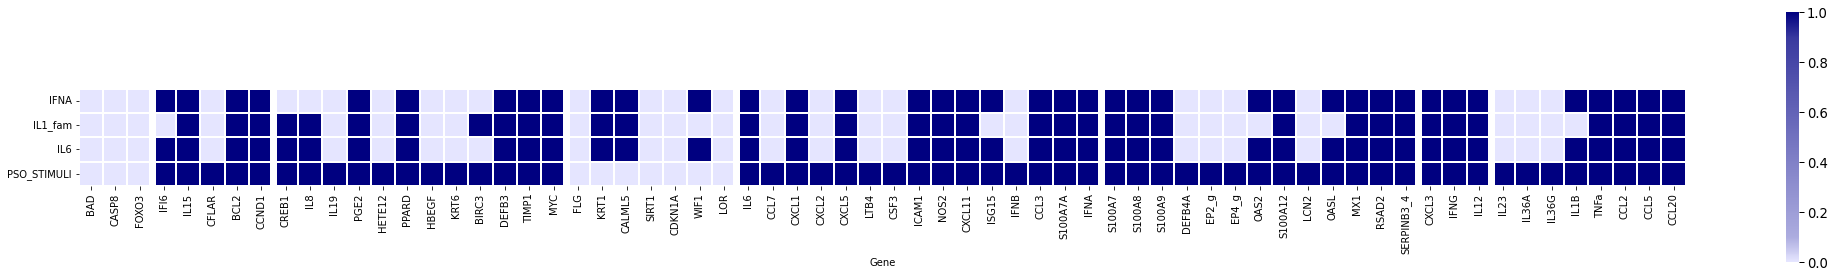

In [14]:
#Reproduce figure from Tsirvouli et al. Now only with the 4 conditions for publication:
#Code is copied from: Tsirvouli et al. notebook

dfs = [IFNAR_fix_df, IL1_fam_fix_df, IL6_fix_df, Psoriasis_state_fix_df]
dfs_named = pd.concat(dfs, keys=["IFNA", "IL1_fam", "IL6", "PSO_STIMULI"])
dfs_named.index = dfs_named.index.droplevel(1)
dfs_named.columns = dfs_named.columns.droplevel(0)

print("Steady states")
fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

sns.set_context("paper", font_scale=1.5)

hc = ['#e5e5ff', '#acacdf', '#7272bf', '#39399f', '#000080']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)

f = sns.heatmap(dfs_named, cmap = cm, square = True, linewidth=0.1, cbar_kws={"shrink": .1})

ax.axvline(3, 0, 5, linewidth=7, c='white')
ax.axvline(8, 0, 5, linewidth=7, c='white')
ax.axvline(20, 0, 5, linewidth=7, c='white')
ax.axvline(27, 0, 5, linewidth=7, c='white')
ax.axvline(42, 0, 5, linewidth=7, c='white')
ax.axvline(55, 0, 5, linewidth=7, c='white')
ax.axvline(58, 0, 5, linewidth=7, c='white')

#f.figure.savefig("stable_state_Frontiers_publication.pdf", dpi = 300)

## PROFILE pipeline

#### Create a list with the personalized models of 185 patients

In [16]:
#Run simulations with all patients and only Phenotypic nodes as output
path_models = "./PROFILE/Models/psoKC/"
list_models = [file for file in os.listdir(path_models) if file.endswith(".bnd") and file.startswith("psoKC_list1_updatedModel_G")]

FileNotFoundError: [Errno 2] No such file or directory: './PROFILE/Models/psoKC/'

In [ ]:
#Run simulations with the ten patients that did not respond to IL-17 inhibition with all the nodes as output

#path_models = "./PROFILE/Models/psoKC/IL17_no_responders_allNodes"
#list_models = [file for file in os.listdir(path_models) if file.endswith(".bnd") and file.startswith("psoKC_list1_all_nodes_G")]


In [5]:
(list_models)

['psoKC_list1_updatedModel_GSM1315610.bnd',
 'psoKC_list1_updatedModel_GSM1315609.bnd',
 'psoKC_list1_updatedModel_GSM1315755.bnd']

In [7]:
drugs=["IL17R", "IL22R","IL1R1","IFNGR","IFNAR","TNFRSF1A","IL1R1","IL6R","IL36R"]

In [9]:
final_table = pd.DataFrame()

i = 0
#for model in list_models[0:2]:
for model in list_models:
    i = i+1
    print(model,i)
    
    # load the model
    m = maboss.load(os.path.join(path_models, model), os.path.join(path_models, model.replace(".bnd", ".cfg")))
    m.update_parameters(max_time=100)

    patient = model.replace("psoKC_list1_updatedModel_", "").replace(".bnd", "")

    # simulate single mutant
    results = maboss.pipelines.simulate_single_mutants(m, drugs, "OFF")
    for drug, result in results.items():
        label = "%s_%s" % (drug[0],drug[1])
        scores[label] = result.get_last_nodes_probtraj()
        print(drug[0],drug[1])
        
        df = result.get_last_nodes_probtraj()
        df['Patient'] = patient
        df['Perturbation'] = label
        final_table = pandas.concat([final_table, df]) 
        traj = result.get_nodes_probtraj()
        traj.to_csv("./updated_maboss_trajectories/trajectories/"+patient+"_"+"sel_patient_IL17.csv")
        fps = result.get_fptable()
        fps.to_csv("./updated_maboss_trajectories/fixpoints/"+label+"_"+patient+"fps.csv")
  

   final_table.to_csv("./updated_maboss_trajectories/final_states_allPatients_phenotypes.csv")

psoKC_list1_updatedModel_GSM1315610.bnd 1
psoKC_list1_updatedModel_GSM1315609.bnd 2
psoKC_list1_updatedModel_GSM1315755.bnd 3


In [7]:
drugs = ['EP2','EP4']

In [8]:
final_table = pandas.DataFrame()

i = 0
#for model in list_models[0:2]:
for model in list_models:
    i = i+1
    print(model,i)
    # load the model
    m = maboss.load(os.path.join(path_models, model), os.path.join(path_models, model.replace(".bnd", ".cfg")))
    m.update_parameters(max_time=100)

    patient = model.replace("psoKC_list1_updatedModel_", "").replace(".bnd", "")

#     # simulate single mutant
    results = maboss.pipelines.simulate_single_mutants(m, drugs, "OFF")
    for drug, result in results.items():
        label = "%s_%s" % (drug[0],drug[1])
#     #    scores[label] = result.get_last_nodes_probtraj()
#         print(drug[0],drug[1])
        
        df = result.get_last_nodes_probtraj()
        df['Patient'] = patient
        df['Perturbation'] = label
        final_table = pandas.concat([final_table, df]) 
        traj = result.get_nodes_probtraj()
        traj.to_csv("./updated_maboss_trajectories/trajectories/"+label+"_"+patient+"_phenotypes.csv")
    # simulate double mutant
  
    #results = maboss.pipelines.simulate_double_mutants(m, drugs[0:3], "OFF")    
    results = maboss.pipelines.simulate_double_mutants(m, drugs, "OFF")    
    for drug, result in results.items():
        label = "%s_%s, %s_%s" % (drug[0][0],drug[0][1],drug[1][0],drug[1][1])
    #    scores[label] = result.get_last_nodes_probtraj()
 #       print((drug[0][0],drug[0][1],drug[1][0],drug[1][1]))
        
        df_c = result.get_last_nodes_probtraj()
        df_c['Patient'] = patient
        df_c['Perturbation'] = label
        final_table = pandas.concat([final_table, df_c]) 
        traj = result.get_nodes_probtraj()
        traj.to_csv("./updated_maboss_trajectories/trajectories/"+label+"_"+patient+"_phenotypes.csv")
        fps = result.get_fptable()
        fps.to_csv("./updated_maboss_trajectories/fixpoints/"+label+"_"+patient+"fps.csv")

    final_table.to_csv("./updated_maboss_trajectories/final_states_allPatients_phenotypes2.csv")

psoKC_list1_updatedModel_GSM1315630.bnd 1
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM1930397.bnd 2
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM1930391.bnd 3
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM1315698.bnd 4
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM1656064.bnd 5
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM1315759.bnd 6
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM1315657.bnd 7
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM1315623.bnd 8
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM1023438.bnd 9
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM1315642.bnd 10
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM3293899.bnd 11
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM1315613.bnd 12
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM2211709.bnd 13
('EP2', 'OFF', 'EP4', 'OFF')
psoKC_list1_updatedModel_GSM1315699.bnd 14
('EP2', 'OFF', 'EP4', 'OFF')
p